In [ ]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (214 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 20 kB/s 
     |████████████████████████████████| 47.6 MB 32 kB/s 


# Trial 1

In [ ]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [ ]:
!gdown --id 10MI6eRY_Ks_sesWH7JGQ46jGvohMXvkZ

Downloading...
From: https://drive.google.com/uc?id=10MI6eRY_Ks_sesWH7JGQ46jGvohMXvkZ
To: /content/1.pdf
100% 15.3M/15.3M [00:00<00:00, 135MB/s]


In [ ]:
reader = easyocr.Reader(['hi'])

In [ ]:
path = "/content/1.pdf"

In [ ]:
images = convert_from_path(path)

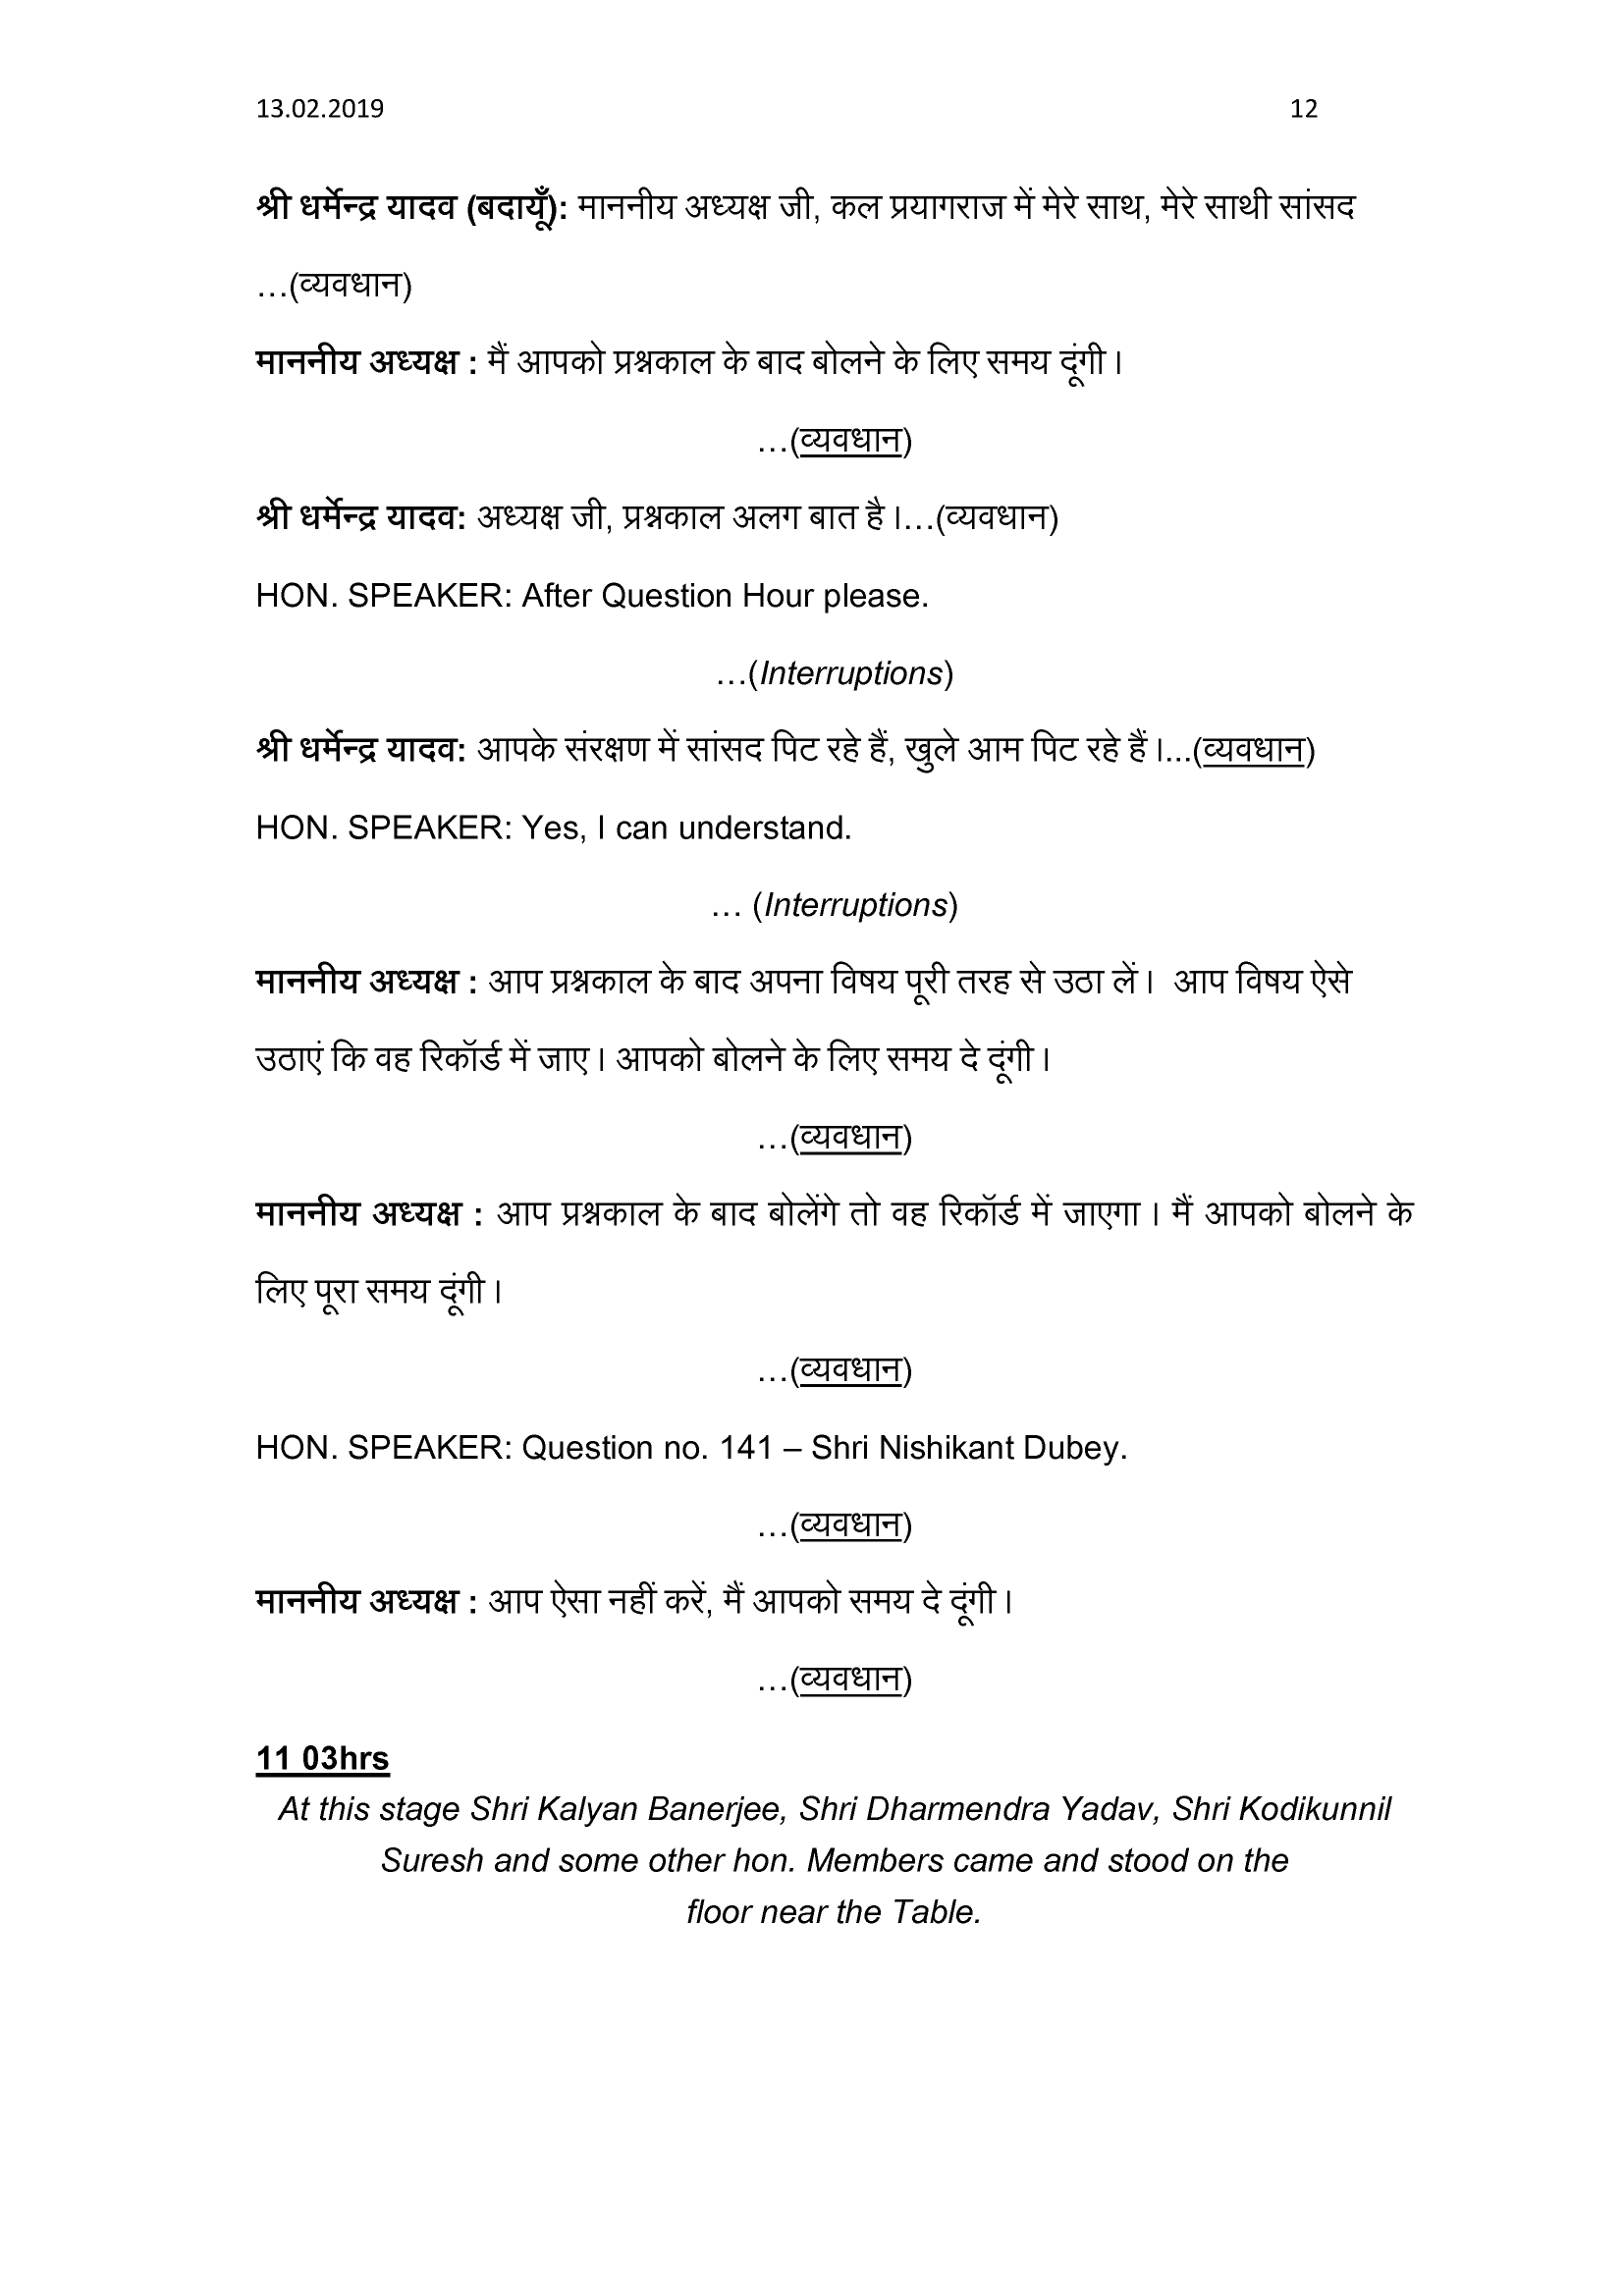

In [ ]:
from IPython.display import display, Image
display(images[11])

In [ ]:
bounds = reader.readtext(np.array(images[11]),min_size=0,slope_ths = 0.2,ycenter_ths = 0.7,height_ths=0.6,width_ths=0.8,decoder='beamsearch',beamWidth=10)
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[258, 96], [396, 96], [396, 126], [258, 126]],
  '13.02.2019',
  0.9962910359413667),
 ([[1312, 96], [1346, 96], [1346, 126], [1312, 126]],
  '12',
  0.8194137571126613),
 ([[296, 181], [1389, 181], [1389, 241], [296, 241]],
  'धर्मेन्द्र यादव (बदायूँ : माननीय अध्यक्ष जी, कल प्रयागराज में नेरे साथः मेरे साथी सांसद',
  0.30703423380961464),
 ([[287, 271], [425, 271], [425, 313], [287, 313]],
  'व्यवधान',
  0.9804414908883056),
 ([[252, 338], [1153, 338], [1153, 401], [252, 401]],
  'माननीय अध्यक्ष : मैं आपको प्रश्नकाल के बाद बोलने के लिए समय दूंगी |',
  0.6419826395672146),
 ([[806, 429], [934, 429], [934, 471], [806, 471]],
  'व्यवधन',
  0.9622614198748922),
 ([[258, 498], [1084, 498], [1084, 554], [258, 554]],
  'श्री धर्मेन्द्र यादवः अध्यक्ष जी, प्रश्नकाल अलग बात है|...व्यवधान)',
  0.22033929542818742),
 ([[258, 584], [949, 584], [949, 632], [258, 632]],
  'ँई. $घदर: गश झप९^ ोध फ़ह2ब९',
  0.0001523821822945181),
 ([[767, 667], [977, 667], [977, 711], [767, 711]],
  'ढ़ाश4फ़ा^७)',
  0

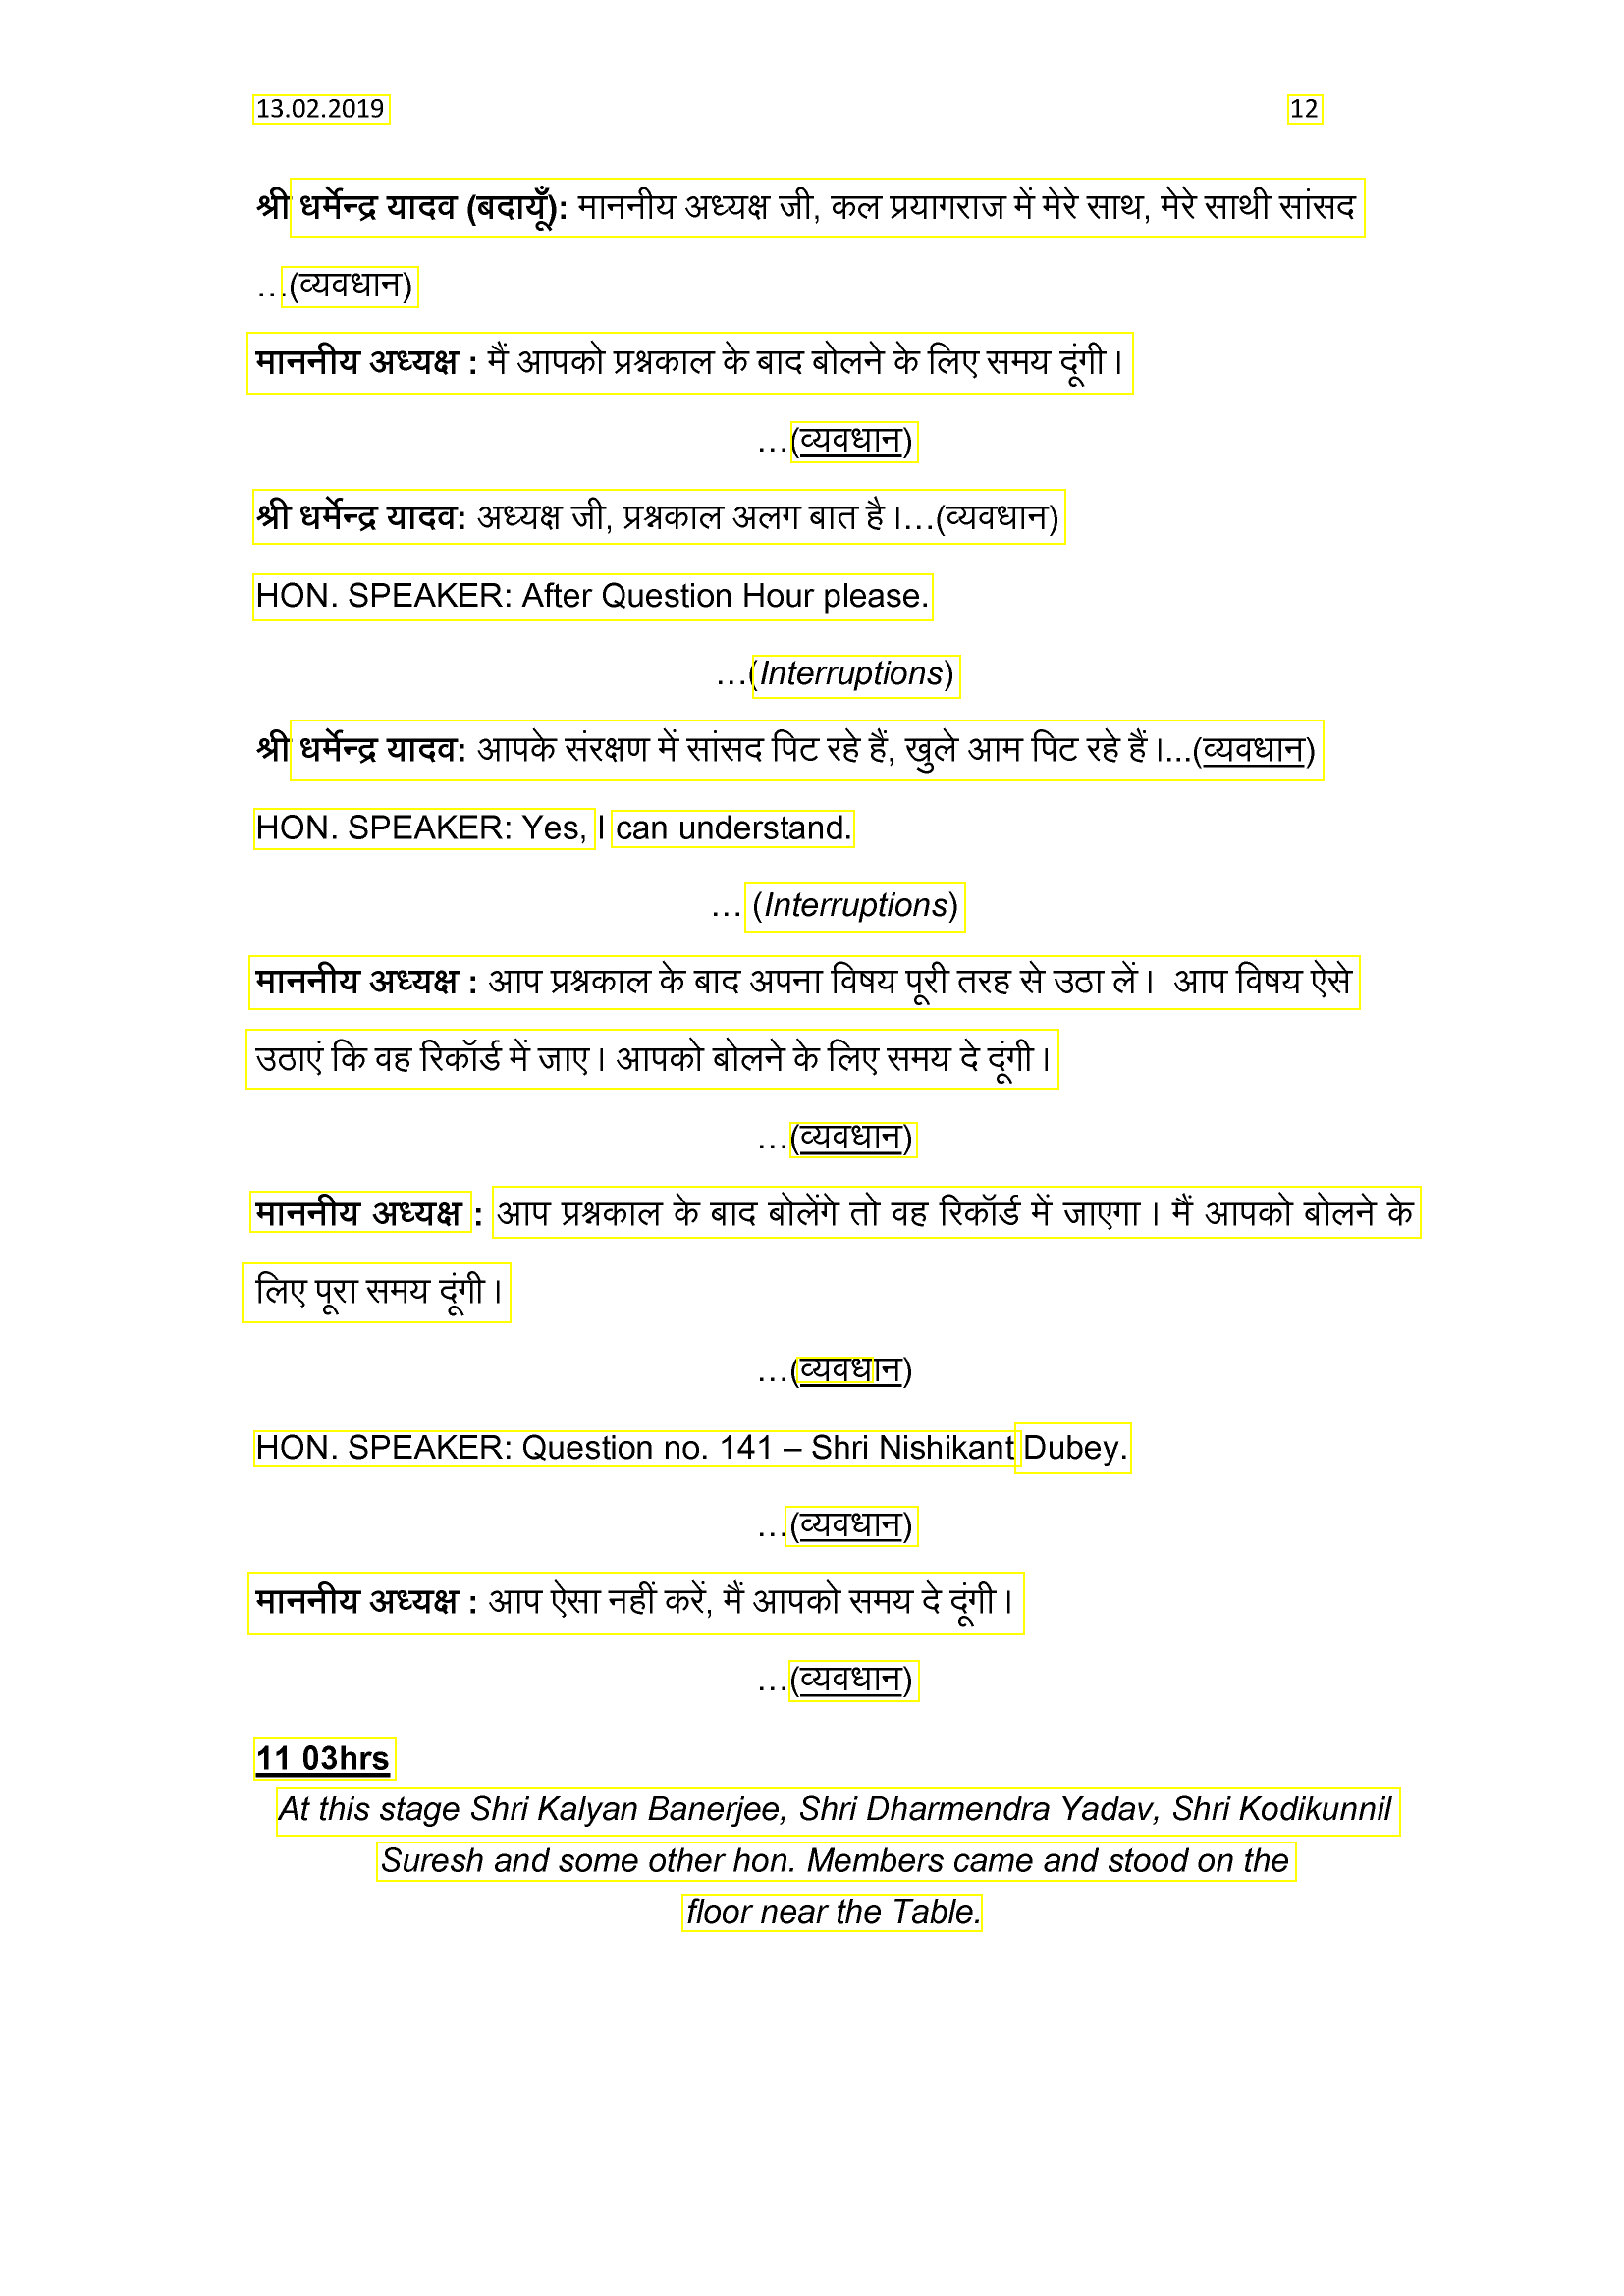

In [ ]:
def draw_boxes(image, bounds, color="yellow", width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width = width)
  return image

draw_boxes(images[11],bounds)

In [ ]:
bounds[1][1]

'12'

In [ ]:
text = ''
for i in range(len(bounds)):
  text = text + bounds[i][1] + '\n'

print(text)

13.02.2019
12
धर्मेन्द्र यादव (बदायूँ : माननीय अध्यक्ष जी, कल प्रयागराज में नेरे साथः मेरे साथी सांसद
व्यवधान
माननीय अध्यक्ष : मैं आपको प्रश्नकाल के बाद बोलने के लिए समय दूंगी |
व्यवधन
श्री धर्मेन्द्र यादवः अध्यक्ष जी, प्रश्नकाल अलग बात है|...व्यवधान)
ँई. $घदर: गश झप९^ ोध फ़ह2ब९
ढ़ाश4फ़ा^७)
धर्मेन्द्र यादवः आपके संरक्षण में सांसद पिट रहे हैं, खुले आम पिट रहे हैं |..व्यवधान)
=ए. डनदर: (९ड,
ट^ 4ृ ^ृ.
(धफ़ऐ^ )
माननीय अध्यक्ष : आप प्रश्नकाल के बाद अपना विषय पूरी तरह से उठा लें| आप विषय ऐसे
उठाएं कि वह रिकॉर्ड में जाए| आपको बोलने के लिए समय दे दूंगी |
व्यवधन
मननीय अध्यक्ष
आप प्रश्नकाल के बाद बोलेंगे तो वह रिकॉर्ड में जाएगा | मैं आपको बोलने के
लिए पूरा समय दूंगी |
व्यवध
=णँ डँ=र: झ९ड^ . १४१ - धब |डँँ७
>ुैु.
्यवधान
माननीय अध्यक्ष : आप ऐसा नहीं करें मैं आपको समय दे दूंगी |
व्यवधान 
11 03|"$
4च ्ड डप९= $ँ (गभ^ 8^श९, $त फौहृग दव३४, $ँ (तधँध1|
डधआ^ "^4 डख़स 0ऐतश ^^. ढ़९क2शआ टख़६ "^व डणृ 0^ ऐ^
गण ^ ऐँ६ 7ँँ९



In [ ]:
with open("temp.txt",'w') as f:
  f.writelines(text)

In [ ]:
with open("temp.txt",'r') as f:
  lines = f.readlines()

In [ ]:
temp = lines
lines

['13.02.2019\n',
 '12\n',
 'धर्मेन्द्र यादव (बदायूँ : माननीय अध्यक्ष जी, कल प्रयागराज में नेरे साथः मेरे साथी सांसद\n',
 'व्यवधान\n',
 'माननीय अध्यक्ष : मैं आपको प्रश्नकाल के बाद बोलने के लिए समय दूंगी |\n',
 'व्यवधन\n',
 'श्री धर्मेन्द्र यादवः अध्यक्ष जी, प्रश्नकाल अलग बात है|...व्यवधान)\n',
 'ँई. $घदर: गश झप९^ ोध फ़ह2ब९\n',
 'ढ़ाश4फ़ा^७)\n',
 'धर्मेन्द्र यादवः आपके संरक्षण में सांसद पिट रहे हैं, खुले आम पिट रहे हैं |..व्यवधान)\n',
 '=ए. डनदर: (९ड,\n',
 'ट^ 4ृ ^ृ.\n',
 '(धफ़ऐ^ )\n',
 'माननीय अध्यक्ष : आप प्रश्नकाल के बाद अपना विषय पूरी तरह से उठा लें| आप विषय ऐसे\n',
 'उठाएं कि वह रिकॉर्ड में जाए| आपको बोलने के लिए समय दे दूंगी |\n',
 'व्यवधन\n',
 'मननीय अध्यक्ष\n',
 'आप प्रश्नकाल के बाद बोलेंगे तो वह रिकॉर्ड में जाएगा | मैं आपको बोलने के\n',
 'लिए पूरा समय दूंगी |\n',
 'व्यवध\n',
 '=णँ डँ=र: झ९ड^ . १४१ - धब |डँँ७\n',
 '>ुैु.\n',
 '्यवधान\n',
 'माननीय अध्यक्ष : आप ऐसा नहीं करें मैं आपको समय दे दूंगी |\n',
 'व्यवधान \n',
 '11 03|"$\n',
 '4च ्ड डप९= $ँ (गभ^ 8^श९, $त फौहृग दव३४, $ँ (तधँध1|\n

In [ ]:
for i in range(len(temp)):  
  temp[i] = re.sub("[^\s\u0900-\u097F" "]","",temp[i])
  temp[i] = re.sub("\u0964","",temp[i])
  temp[i] = re.sub("\n","",temp[i])

In [ ]:
temp

['',
 '',
 'धर्मेन्द्र यादव बदायूँ  माननीय अध्यक्ष जी कल प्रयागराज में नेरे साथः मेरे साथी सांसद',
 'व्यवधान',
 'माननीय अध्यक्ष  मैं आपको प्रश्नकाल के बाद बोलने के लिए समय दूंगी ',
 'व्यवधन',
 'श्री धर्मेन्द्र यादवः अध्यक्ष जी प्रश्नकाल अलग बात हैव्यवधान',
 'ँई घदर गश झप९ ोध फ़हब९',
 'ढ़ाशफ़ा७',
 'धर्मेन्द्र यादवः आपके संरक्षण में सांसद पिट रहे हैं खुले आम पिट रहे हैं व्यवधान',
 'ए डनदर ९ड',
 'ट ृ ृ',
 'धफ़ऐ ',
 'माननीय अध्यक्ष  आप प्रश्नकाल के बाद अपना विषय पूरी तरह से उठा लें आप विषय ऐसे',
 'उठाएं कि वह रिकॉर्ड में जाए आपको बोलने के लिए समय दे दूंगी ',
 'व्यवधन',
 'मननीय अध्यक्ष',
 'आप प्रश्नकाल के बाद बोलेंगे तो वह रिकॉर्ड में जाएगा  मैं आपको बोलने के',
 'लिए पूरा समय दूंगी ',
 'व्यवध',
 'णँ डँर झ९ड  १४१  धब डँँ७',
 'ुैु',
 '्यवधान',
 'माननीय अध्यक्ष  आप ऐसा नहीं करें मैं आपको समय दे दूंगी ',
 'व्यवधान ',
 ' ',
 'च ्ड डप९ ँ गभ श९ त फौहृग दव३४ ँ तधँध',
 'डधआ  डख़स ऐतश  ढ़९कशआ टख़६ व डणृ  ऐ',
 'गण  ऐँ६ ँँ९']